<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_3%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[ 미니 프로젝트 (1) ]**
### **3조 - 서혜현, 곽지수, 임정현, 서유진, 이인서** 

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 

- 조건: 변수 2개 이상 연결한 결과값 포함

- 제출기한: 2022.04.03 (월) 23:59

- 관련 사이트: https://dacon.io/competitions/open/235536/data


## **1. 라이브러리 및 데이터**

In [94]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기 
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/프로젝트/미니프로젝트(1) 자료/movies_train.csv')

## **2. 탐색적 자료분석(EDA)**

### **2-1) 요약 / 결측치 확인 및 데이터 전처리**

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [8]:
# 데이터 요약 
print(train.shape)

(600, 12)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
pd.options.display.float_format = '{:.1f}'.format

In [11]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [12]:
# 결측치 확인 및 데이터 전처리 
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [13]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [14]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


In [15]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [16]:
train['release_time']=pd.to_datetime(train['release_time'])

### **2-2) 데이터 시각화 및 분석**
### **(3) 배급사별 영화 스텝 수 분석**


* distributor : 배급사 
* num_staff : 스텝 수 

In [15]:
# 배급사별 평균 스텝수 구하기 
st_mean=train[['distributor','num_staff']].groupby('distributor').mean()
st_mean.sort_values(by='num_staff', ascending=False,inplace=True)

# => 대부분의 영화에서 스텝의 수가 두자릿 수임을 확인, 분석을 위해 평균 스텝수가 많은 상위 15개를 추출
staff=st_mean[0:16]
staff=pd.DataFrame(staff)
staff=staff.reset_index(inplace=False) # 기존 인덱스를 새로운 칼럼으로 추가
staff

,distributor,num_staff
0,주머니필름,477.000000
1,(주)아이필름코퍼레이션,458.000000
2,스튜디오 블루,436.000000
3,SK텔레콤(주),410.000000
4,KT,364.000000
5,(주)쇼박스,360.384615
6,CGV 아트하우스,342.500000
7,전주국제영화제,336.000000
8,CJ E&M Pictures,335.000000
9,시너지,333.100000


In [16]:
# 평균 스텝수가 상위 15개인 배급사에 대한 원본 데이터를 가져오기
train_dist=train[train['distributor'].isin(staff['distributor'])]
train_dist.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


**그래프 1) 배급사별 평균 스텝수 그래프**

Text(0.5, 1.0, '배급사별 평균 스텝 수')

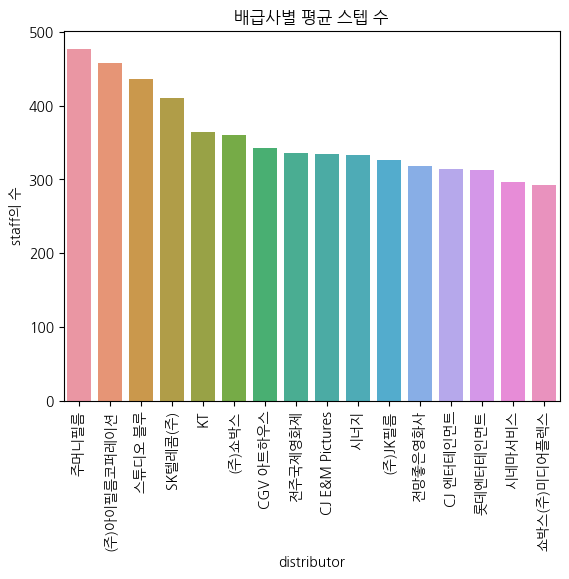

In [17]:
plt.xticks(rotation=90)
ax=sns.barplot(data=staff, x='distributor',y='num_staff')
ax.set_xlabel('distributor')
ax.set_ylabel('staff의 수')
ax.set_title('배급사별 평균 스텝 수')

**▶ 그래프 해석**
- 주머니필름, (주)아이필름코퍼레이션, 스튜디오 블루, SK텔레콤(주) 순으로 높으며, 이 4개의 배급사는 평균 스탭의 수가 400이상으로 다른 배급사에 비해 월등히 스텝수가 많음을 알 수 있다.

**그래프 2) 배급사별 스텝수에 대한 boxplot 그래프**

Text(0.5, 1.0, '배급사별 스텝 수에 대한 boxplot')

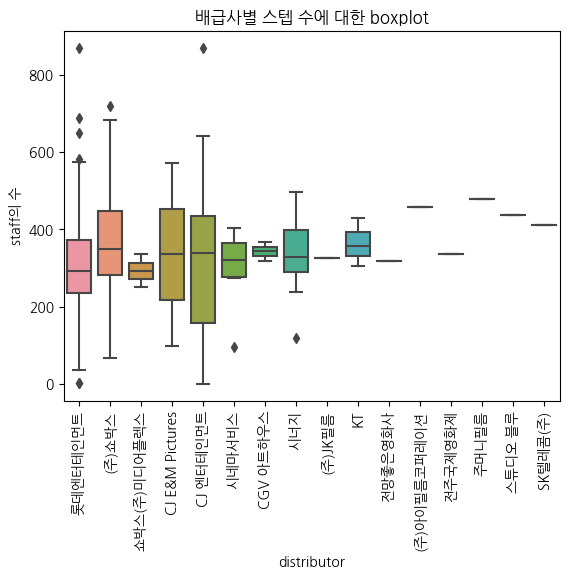

In [19]:
plt.xticks(rotation=90)
ax=sns.boxplot(data=train_dist, x='distributor', y='num_staff')
ax.set_xlabel('distributor')
ax.set_ylabel('staff의 수')
ax.set_title('배급사별 스텝 수에 대한 boxplot')

**▶ 그래프 해석**
- CJ E&M Pictures와 CJ엔터테인먼트는 타 배급사에 비해서 박스플랏의 범위가 넓고, 이를 통해 두 배급사는 영화에 따라 스텝의 수가 차이난다.
- 롯데엔터테인먼트, (주)쇼박스, CJ엔터테인먼트에서 위쪽에 이상치가 존재하는 것을 보아 평균보다 훨씬 많은 스텝이 참여한 영화가 있다.
- 롯데엔터테인먼트, 시네마서비스, 시너지에서 아래쪽에 이상치가 존재하는 것을 보아 평균보다 스텝의 수가 훨씬 적게 참여했던 영화가 있다.
- 오른쪽의 전망좋은 영화사, 전주국제 영화제, 주머니 필름등의 배급사들은 제작한 영화의 수가 1개이기 때문에 온전한 박스플랏의 형태가 그려지지 않는다. 

### **(4) 감독의 이전 영화 평균 관객수와 현 영화 관객수의 관계**
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* director : 감독이름
* box_off_num : 관객수


In [33]:
train_num=train[['director','dir_prev_bfnum', 'box_off_num']]

Text(0, 0.5, '해당 감독의 현재 영화의 관객 수')

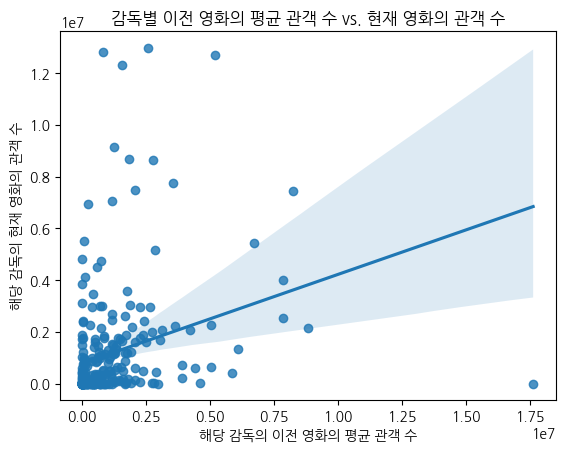

In [25]:
ax = sns.regplot(data=train_num,x='dir_prev_bfnum', y='box_off_num')
ax.set_title('감독별 이전 영화의 평균 관객 수 vs. 현재 영화의 관객 수')
ax.set_xlabel('해당 감독의 이전 영화의 평균 관객 수')
ax.set_ylabel('해당 감독의 현재 영화의 관객 수')

**▶ 그래프 해석**
- 대부분의 데이터들이 관객수 250만명 이전에 분포한다.
- 그래프를 보았을 때 몇명 영화들은 해당 감독의 이전 영화 평균 관객수가 250만명 이하였음에도 불구하고 현재 영화 관객수가 600만 이상으로 높다. 
- 이 데이터에는 해당 감독의 이전 영화 평균 관객수가 700만 이상으로 높은게 거의 없기 때문에, 이전 관객수가 높았을 때 다음 영화의 관객수가 어떤지 살펴보기 힘들다.